In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import normaltest

In [2]:
dt = 0.001
tau = 1
total_time = 50.0
num_steps = int(total_time / dt)
noise_sigma = 0.05

x = np.array([1.0, 0.0])
dynamics = np.array([[1, -1], [1, 1]])
alpha = dt / tau
xs = [x]
for t in range(num_steps):
    noise = np.random.normal(0, 1, size=x.shape)
    x = (1 - alpha) * x + alpha * (dynamics @ x + np.sqrt(2 / alpha) * noise_sigma * noise)
    xs.append(x)
xs = np.array(xs)

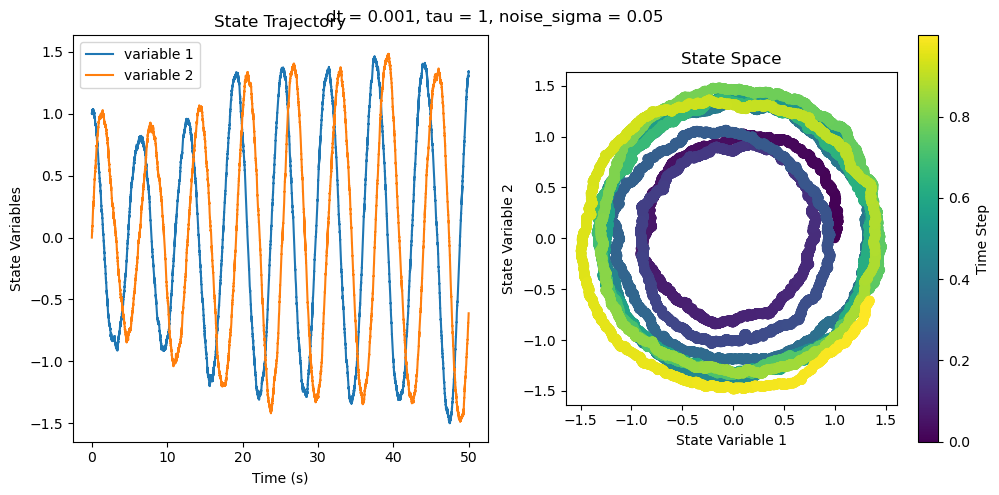

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(np.arange(xs.shape[0]) * dt, xs, label=["variable 1", "variable 2"])
ax[0].legend()
ax[0].set_title("State Trajectory")
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("State Variables")
ax[1].scatter(*xs.T, c=np.arange(len(xs)) / len(xs), cmap="viridis")
ax[1].set_title("State Space")
ax[1].set_xlabel("State Variable 1")
ax[1].set_ylabel("State Variable 2")
ax[1].set_aspect("equal", adjustable="box")
plt.tight_layout()
plt.colorbar(ax[1].collections[0], ax=ax[1], label="Time Step")
plt.suptitle("dt = {}, tau = {}, noise_sigma = {}".format(dt, tau, noise_sigma))
plt.show()

In [355]:
dt = 0.001
tau = 0.01
total_time = 500.0
num_steps = int(total_time / dt)
noise_sigma = 0.5

x = np.array([0.0])
alpha = dt / tau
xs = [x]
for t in range(num_steps):
    noise = np.random.normal(0, 1, size=x.shape)
    # x = (1 - alpha) * x + alpha * (noise_sigma * np.sqrt(2 / alpha) * noise)
    x = (1 - alpha) * x + alpha * (noise_sigma * np.sqrt(2 - alpha) / np.sqrt(alpha) * noise)
    xs.append(x)
xs = np.array(xs)

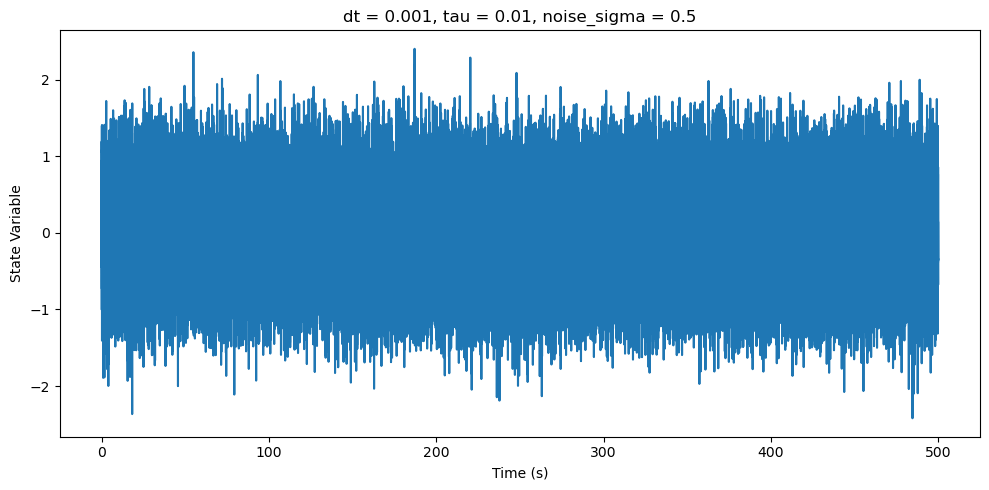

In [356]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(np.arange(len(xs)) * dt, xs)
ax.set_title("dt = {}, tau = {}, noise_sigma = {}".format(dt, tau, noise_sigma))
ax.set_xlabel("Time (s)")
ax.set_ylabel("State Variable")
plt.tight_layout()
plt.show()

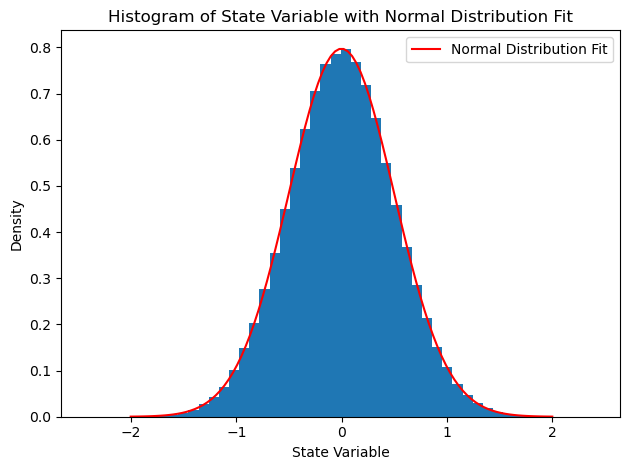

In [357]:
mu = np.mean(xs)
std = np.std(xs)
plt.hist(xs, bins=50, density=True)
plt.plot(np.linspace(mu - 4*std, mu + 4*std, 100),
         (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((np.linspace(mu - 4*std, mu + 4*std, 100) - mu) / std) ** 2),
         color='red', label='Normal Distribution Fit')
plt.title("Histogram of State Variable with Normal Distribution Fit")
plt.xlabel("State Variable")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
# plt.yscale('log')
plt.show()

In [358]:
np.std(xs), normaltest(xs).pvalue

(np.float64(0.5004924701886398), array([0.04947406]))